In [130]:
import numpy as np
import matplotlib.pyplot as ply


In [131]:
%pip install scipy
import scipy
from scipy.linalg import logm, expm

In [132]:
X = np.matrix('0 1; 1 0')
Z = np.matrix('1 0; 0 -1')
Y = np.matrix('0 -1j; 1j 0') 
I = np.matrix('1 0; 0 1')
c = 1/np.sqrt(2)*np.matrix('1;1') ##ket(+)
d = 1/np.sqrt(2)*np.matrix('1;-1') ##Ket(-)
a = np.matrix('1;0') ##Ket(0)
b = np.matrix('0;1') ##Ket(1)

In [133]:
def log2(a):
    return logm(a)/np.log(2.0)

In [134]:
def BB84(P,p):
    return (1-P)**2*p+P*(1-P)*X*p*X+P*(1-P)*Z*p*Z+P**2*Y*p*Y

In [135]:
def BB841(P,p):
    return (1-P)**2*np.kron(I,I)*p*np.kron(I,I)+P*(1-P)*np.kron(I,X)*p*np.kron(I,X)+P*(1-P)*np.kron(I,Z)*p*np.kron(I,Z)+P**2*np.kron(I,Y)*p*np.kron(I,Y)

In [103]:
def f(theta): ## coherent information for one BB84 channel
    r1=theta[0]
    r2=theta[1]%(np.sqrt(1-r1**2))
    r3=theta[2]%(np.sqrt(1-r1**2-r2**2))
    phi=r1*np.kron(a,a)+r2*np.exp(1j*theta[3])*np.kron(a,b)+r3*np.exp(1j*theta[4])*np.kron(b,a)+np.sqrt(1-r1**2-r2**2-r3**2)*np.exp(1j*theta[5])*np.kron(b,b)
    phi1=np.matmul(phi,phi.conj().T) ##p_AB
    phi2=r1**2*np.matmul(a,a.conj().T)+r1*r2*np.exp(1j*(-theta[3]))*np.matmul(a,b.conj().T)+r2**2*np.matmul(b,b.conj().T)+r1*r2*np.exp(1j*theta[3])*np.matmul(b,a.conj().T)+r3**2*np.matmul(a,a.conj().T)+r3*np.sqrt(1-r1**2-r2**2-r3**2)*np.exp(1j*(theta[4]-theta[5]))*np.matmul(a,b.conj().T)+(1-r1**2-r2**2-r3**2)*np.matmul(b,b.conj().T)+r3*np.sqrt(1-r1**2-r2**2-r3**2)*np.exp(1j*(theta[5]-theta[4]))*np.matmul(b,a.conj().T)##p_B
    h=-np.trace(np.matmul(BB84(0.9,phi2),log2(BB84(0.9,phi2))))##quantum entropy of p_B
    j=-np.trace(np.matmul(BB841(0.9,phi1),log2(BB841(0.9,phi1))))##quantum entropy of p_AB
    return j-h

In [37]:
from scipy.optimize import dual_annealing, minimize, differential_evolution
bnds = [(0,1),(0,1),(0,1),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2)]
results = dual_annealing(f,bnds,maxiter=5)
results

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: (-0.06200881282142001+1.073957014043075e-17j)
       x: [ 7.071e-01  2.642e-07  0.000e+00  3.917e-01  1.655e+00
            3.305e+00]
     nit: 5
    nfev: 124
    njev: 9
    nhev: 0

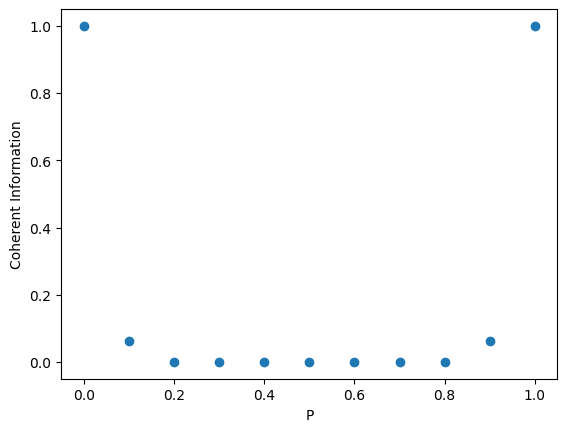

In [88]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a=[0.9999999999940516,0.06200881280187809,2.7909563549144423e-11,2.220446049250313e-16,3.613402699276236e-07,1.2716734332229862e-09,2.220446049250313e-16,1.1102230246251565e-15,-5.551115123125783e-16,0.06200881282142001,0.9999999999969549]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Coherent Information")
ply.show()

In [75]:
def f1(theta):  ##Coherent Inforamtion for Superposition of two BB84 channels
    e=np.matmul(c,c.conj().T)  ## p_Plus
    g=np.matmul(d,d.conj().T)  ## p_minus
    r1=theta[0]
    r2=theta[1]%(np.sqrt(1-r1**2))
    r3=theta[2]%(np.sqrt(1-r1**2-r2**2))
    phi=r1*np.kron(a,a)+r2*np.exp(1j*theta[3])*np.kron(a,b)+r3*np.exp(1j*theta[4])*np.kron(b,a)+np.sqrt(1-r1**2-r2**2-r3**2)*np.exp(1j*theta[5])*np.kron(b,b)
    phi1=np.matmul(phi,phi.conj().T)##p_AB
    phi2=r1**2*np.matmul(a,a.conj().T)+r1*r2*np.exp(1j*(-theta[3]))*np.matmul(a,b.conj().T)+r2**2*np.matmul(b,b.conj().T)+r1*r2*np.exp(1j*theta[3])*np.matmul(b,a.conj().T)+r3**2*np.matmul(a,a.conj().T)+r3*np.sqrt(1-r1**2-r2**2-r3**2)*np.exp(1j*(theta[4]-theta[5]))*np.matmul(a,b.conj().T)+(1-r1**2-r2**2-r3**2)*np.matmul(b,b.conj().T)++r3*np.sqrt(1-r1**2-r2**2-r3**2)*np.exp(1j*(theta[5]-theta[4]))*np.matmul(b,a.conj().T)##p_B
    F=(1-1)**2*np.exp(-1j*theta[6])*I+0*(1-0.9)*np.exp(-1j*theta[7])*X+0*(1-0.9)*np.exp(-1j*theta[8])*Z+1**2*np.exp(-1j*theta[9])*Y##Vacuum Interference Operator
    phi3=np.kron(0.5*(BB84(1,phi2)+np.matmul(F,np.matmul(phi2,F.conj().T))),e)+np.kron(0.5*(BB84(1,phi2)-np.matmul(F,np.matmul(phi2,F.conj().T))),g)
    phi4=np.kron(0.5*(BB841(1,phi1)+np.matmul(np.kron(I,F),np.matmul(phi1,np.kron(I,F.conj().T)))),e)+np.kron(0.5*(BB841(1,phi1)-np.matmul(np.kron(I,F),np.matmul(phi1,np.kron(I,F.conj().T)))),g)
    h=-np.trace(np.matmul(phi3,log2(phi3)))##quantum entropy of p_B
    j=-np.trace(np.matmul(phi4,log2(phi4)))##quantum entropy of p_AB
    return j-h

In [86]:
from scipy.optimize import dual_annealing, minimize, differential_evolution
bnds = [(0,1),(0,1),(0,1),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2)]
results = dual_annealing(f1,bnds,maxiter=2)
results

logm result may be inaccurate, approximate err = 1.642198512526501e-08
logm result may be inaccurate, approximate err = 9.902023625571186e-12
logm result may be inaccurate, approximate err = 9.723170163845706e-06
logm result may be inaccurate, approximate err = 9.902023625571186e-12
logm result may be inaccurate, approximate err = 2.3731851918149674e-06
logm result may be inaccurate, approximate err = 7.447388703933853e+25
logm result may be inaccurate, approximate err = 3.5399414501012354e-13
logm result may be inaccurate, approximate err = 9.902023625571186e-12
logm result may be inaccurate, approximate err = 9.902023625571186e-12
logm result may be inaccurate, approximate err = 9.902023625571186e-12
logm result may be inaccurate, approximate err = 4.3838611588617526e+117
logm result may be inaccurate, approximate err = 8.267418843888332e-10
logm result may be inaccurate, approximate err = 1.6244210905003238e+98
logm result may be inaccurate, approximate err = 1.601207091452138e-06
l

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: (-0.9998739845388571+6.382705483087216e-16j)
       x: [ 7.047e-01  7.177e-01  8.526e-04  5.516e+00  2.038e+00
            3.066e+00  6.421e-01  4.401e-01  4.633e+00  6.709e-02]
     nit: 2
    nfev: 415
    njev: 34
    nhev: 0

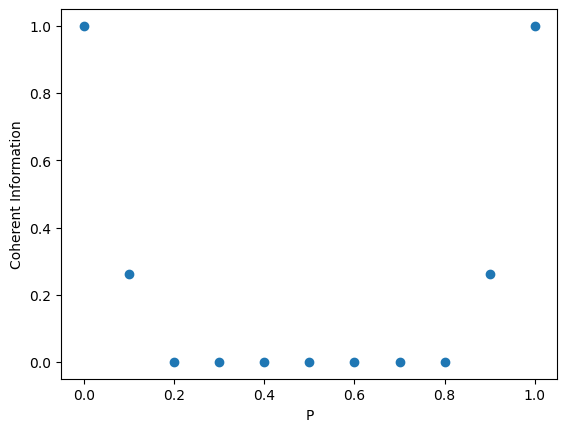

In [89]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a=[0.999999999999952,0.2625029926621154,1.2382317393644371e-11,2.826960977908577e-05,0,0,-5.44212674924438e-10,-4.178990486991552e-11,-1.021467355144523e-10,0.2625029926979081,0.9998739845388571]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Coherent Information")
ply.show()

In [50]:
def Eve1(theta): ## Orthogonal One BB84 channel
    y_0=np.cos(theta[0])*a+np.exp(1j*theta[1])*np.sin(theta[0])*b
    y_1=np.sin(theta[0])*a-np.exp(1j*theta[1])*np.cos(theta[0])*b
    p_y_0=np.matmul(y_0,y_0.conj().T)
    p_y_1=np.matmul(y_1,y_1.conj().T)
    p_XB=theta[2]*np.kron(np.matmul(a,a.conj().T),BB84(1,p_y_0))+(1-theta[2])*np.kron(np.matmul(b,b.conj().T),BB84(1,p_y_1))
    p_B=theta[2]*BB84(1,p_y_0)+(1-theta[2])*BB84(1,p_y_1)
    p_X=theta[2]*np.matmul(a,a.conj().T)+(1-theta[2])*np.matmul(b,b.conj().T)
    h=-np.trace(np.matmul(p_XB,log2(p_XB)))
    j=-np.trace(np.matmul(p_B,log2(p_B)))
    k=-np.trace(np.matmul(p_X,log2(p_X)))
    p_A=theta[2]*p_y_0+(1-theta[2])*p_y_1
    E=np.cos(theta[3])*a+np.sin(theta[3])*np.exp(1j*theta[4])*b
    u_00=(1-1)*I           
    u_01=np.sqrt((1-0.2)*0)*X
    u_10=np.sqrt((1-0.2)*0)*Z
    u_11=1*Y
    u=np.kron(u_00,np.matmul(a,a.conj().T))+np.kron(u_01,np.matmul(a,b.conj().T))+np.kron(u_10,np.matmul(b,a.conj().T))+np.kron(u_11,np.matmul(b,b.conj().T))
    E1=np.matmul(E,E.conj().T)
    f1=np.trace(np.matmul(u_00,np.matmul(p_A,u_00.conj().T))*np.cos(theta[3])**2+np.cos(theta[3])*np.sin(theta[3])*np.exp(-1j*theta[4])*np.matmul(u_00,np.matmul(p_A,u_01.conj().T))+np.cos(theta[3])*np.sin(theta[3])*np.exp(1j*theta[4])*np.matmul(u_01,np.matmul(p_A,u_00.conj().T))+np.matmul(u_01,np.matmul(p_A,u_01.conj().T))*np.sin(theta[3])**2)
    f2=np.trace(np.matmul(u_00,np.matmul(p_A,u_10.conj().T))*np.cos(theta[3])**2+np.cos(theta[3])*np.sin(theta[3])*np.exp(-1j*theta[4])*np.matmul(u_00,np.matmul(p_A,u_11.conj().T))+np.cos(theta[3])*np.sin(theta[3])*np.exp(1j*theta[4])*np.matmul(u_01,np.matmul(p_A,u_10.conj().T))+np.matmul(u_01,np.matmul(p_A,u_11.conj().T))*np.sin(theta[3])**2)
    f3=np.trace(np.matmul(u_10,np.matmul(p_A,u_00.conj().T))*np.cos(theta[3])**2+np.cos(theta[3])*np.sin(theta[3])*np.exp(-1j*theta[4])*np.matmul(u_10,np.matmul(p_A,u_01.conj().T))+np.cos(theta[3])*np.sin(theta[3])*np.exp(1j*theta[4])*np.matmul(u_11,np.matmul(p_A,u_00.conj().T))+np.matmul(u_11,np.matmul(p_A,u_01.conj().T))*np.sin(theta[3])**2)
    f4=np.trace(np.matmul(u_10,np.matmul(p_A,u_10.conj().T))*np.cos(theta[3])**2+np.cos(theta[3])*np.sin(theta[3])*np.exp(-1j*theta[4])*np.matmul(u_10,np.matmul(p_A,u_11.conj().T))+np.cos(theta[3])*np.sin(theta[3])*np.exp(1j*theta[4])*np.matmul(u_11,np.matmul(p_A,u_10.conj().T))+np.matmul(u_11,np.matmul(p_A,u_11.conj().T))*np.sin(theta[3])**2)
    f5=[[f1,f2], [f3,f4]]   
    h1=-np.trace(np.matmul(f5,log2(f5)))
    j1=-np.trace(np.matmul(np.kron(p_X,f5),log2(np.kron(p_X,f5))))
    k1=-np.trace(np.matmul(p_X,log2(p_X)))
    return -(j+k-h-(h1+k1-j1))

In [51]:
from scipy.optimize import dual_annealing, minimize, differential_evolution
bnds = [(0,np.pi/2),(0,np.pi*2),(0,1),(0,np.pi/2),(0,np.pi*2)]
results = dual_annealing(Eve1,bnds,maxiter=200)
results

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: (-0.9999999999969549-1.8396022423172163e-15j)
       x: [ 6.340e-01  9.018e-01  5.000e-01  1.571e+00  1.799e-01]
     nit: 200
    nfev: 2043
    njev: 7
    nhev: 0

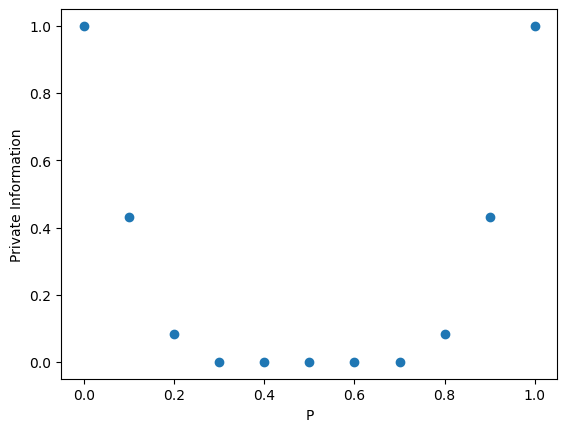

In [52]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a=[0.9999999999999981,0.43100440641009774,0.08457237184966537,0,0,0,0,0,0.08457237174515475,0.43100440640460147,0.9999999999969549]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Private Information")
ply.show()

In [107]:
def SupE1(theta):## Othogonal superposition case
    e=np.matmul(c,c.conj().T)
    g=np.matmul(d,d.conj().T)
    y_0=np.cos(theta[0])*a+np.exp(1j*theta[1])*np.sin(theta[0])*b
    y_1=np.sin(theta[0])*a-np.exp(1j*theta[1])*np.cos(theta[0])*b
    p_y_0=np.matmul(y_0,y_0.conj().T)
    p_y_1=np.matmul(y_1,y_1.conj().T)
    p_XA=theta[2]*np.kron(np.matmul(a,a.conj().T),p_y_0)+(1-theta[2])*np.kron(np.matmul(b,b.conj().T),p_y_1)
    p_XB=theta[2]*np.kron(np.matmul(a,a.conj().T),BB84(0.3,p_y_0))+(1-theta[2])*np.kron(np.matmul(b,b.conj().T),BB84(0.3,p_y_1))
    p_B=theta[2]*BB84(0.3,p_y_0)+(1-theta[2])*BB84(0.3,p_y_1)
    p_A=theta[2]*p_y_0+(1-theta[2])*p_y_1
    p_X=theta[2]*np.matmul(a,a.conj().T)+(1-theta[2])*np.matmul(b,b.conj().T)
    F=(1-0.3)**2*np.exp(-1j*theta[3])*I+0.3*(1-0.3)*np.exp(-1j*theta[4])*X+0.3*(1-0.3)*np.exp(-1j*theta[5])*Z+0.3**2*np.exp(-1j*theta[6])*Y
    phi3=p_X
    phi4=np.kron(0.5*(p_B+np.matmul(F,np.matmul(p_A,F.conj().T))),e)+np.kron(0.5*(p_B-np.matmul(F,np.matmul(p_A,F.conj().T))),g)
    phi5=np.kron(0.5*(p_XB+np.matmul(np.kron(I,F),np.matmul(p_XA,np.kron(I,F.conj().T)))),e)+np.kron(0.5*(p_XB-np.matmul(np.kron(I,F),np.matmul(p_XA,np.kron(I,F.conj().T)))),g)
    h=-np.trace(np.matmul(phi3,log2(phi3)))
    j=-np.trace(np.matmul(phi4,log2(phi4)))
    k=-np.trace(np.matmul(phi5,log2(phi5)))
    E=np.cos(theta[7])*a+np.sin(theta[7])*np.exp(1j*theta[8])*b
    E1=np.matmul(E,E.conj().T)
    u_00=(1-0.3)*I           
    u_01=np.sqrt((1-0.3)*0.3)*X
    u_10=np.sqrt((1-0.3)*0.3)*Z
    u_11=0.3*Y
    u=np.kron(u_00,np.matmul(a,a.conj().T))+np.kron(u_01,np.matmul(a,b.conj().T))+np.kron(u_10,np.matmul(b,a.conj().T))+np.kron(u_11,np.matmul(b,b.conj().T))
    f1=np.trace(np.matmul(u_00,np.matmul(p_A,u_00.conj().T))*np.cos(theta[7])**2+np.cos(theta[7])*np.sin(theta[7])*np.exp(-1j*theta[8])*np.matmul(u_00,np.matmul(p_A,u_01.conj().T))+np.cos(theta[7])*np.sin(theta[7])*np.exp(1j*theta[8])*np.matmul(u_01,np.matmul(p_A,u_00.conj().T))+np.matmul(u_01,np.matmul(p_A,u_01.conj().T))*np.sin(theta[7])**2)
    f2=np.trace(np.matmul(u_00,np.matmul(p_A,u_10.conj().T))*np.cos(theta[7])**2+np.cos(theta[7])*np.sin(theta[7])*np.exp(-1j*theta[8])*np.matmul(u_00,np.matmul(p_A,u_11.conj().T))+np.cos(theta[7])*np.sin(theta[7])*np.exp(1j*theta[8])*np.matmul(u_01,np.matmul(p_A,u_10.conj().T))+np.matmul(u_01,np.matmul(p_A,u_11.conj().T))*np.sin(theta[7])**2)
    f3=np.trace(np.matmul(u_10,np.matmul(p_A,u_00.conj().T))*np.cos(theta[7])**2+np.cos(theta[7])*np.sin(theta[7])*np.exp(-1j*theta[8])*np.matmul(u_10,np.matmul(p_A,u_01.conj().T))+np.cos(theta[7])*np.sin(theta[7])*np.exp(1j*theta[8])*np.matmul(u_11,np.matmul(p_A,u_00.conj().T))+np.matmul(u_11,np.matmul(p_A,u_01.conj().T))*np.sin(theta[7])**2)
    f4=np.trace(np.matmul(u_10,np.matmul(p_A,u_10.conj().T))*np.cos(theta[7])**2+np.cos(theta[7])*np.sin(theta[7])*np.exp(-1j*theta[8])*np.matmul(u_10,np.matmul(p_A,u_11.conj().T))+np.cos(theta[7])*np.sin(theta[7])*np.exp(1j*theta[8])*np.matmul(u_11,np.matmul(p_A,u_10.conj().T))+np.matmul(u_11,np.matmul(p_A,u_11.conj().T))*np.sin(theta[7])**2)
    f5=[[f1,f2], [f3,f4]]
    phi6=np.kron(0.5*(f5+np.matmul(F,np.matmul(E1,F.conj().T))),e)+np.kron(0.5*(f5-np.matmul(F,np.matmul(E1,F.conj().T))),g)
    phi7=p_X
    phi8=np.kron(0.5*(np.kron(p_X,f5)+np.matmul(np.kron(I,F),np.matmul(np.kron(p_X,E1),np.kron(I,F.conj().T)))),e)+np.kron(0.5*(np.kron(p_X,f5)-np.matmul(np.kron(I,F),np.matmul(np.kron(p_X,E1),np.kron(I,F.conj().T)))),g)
    h1=-np.trace(np.matmul(phi6,log2(phi6)))
    j1=-np.trace(np.matmul(phi7,log2(phi7)))
    k1=-np.trace(np.matmul(phi8,log2(phi8)))
    return -(h+j-k-(h1+j1-k1))

In [108]:
from scipy.optimize import dual_annealing, minimize, differential_evolution
bnds = [(0,np.pi/2),(0,np.pi*2),(0,1),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2),(0,np.pi/2),(0,np.pi*2)]
results = dual_annealing(SupE1,bnds,maxiter=200)
results

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: (-0-0j)
       x: [ 7.308e-02  2.061e+00  1.000e+00  6.712e-01  3.550e+00
            6.278e+00  6.107e+00  2.312e-01  5.834e-01]
     nit: 200
    nfev: 3621
    njev: 2
    nhev: 0

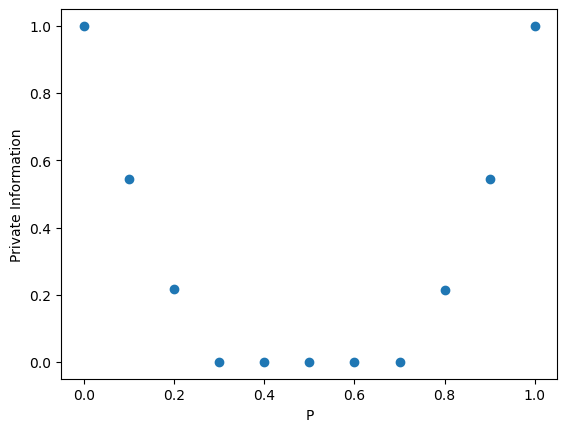

In [109]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a=[0.9999999999996929,0.5452074781344851,0.21647286011113365,0,0,0,0,0,0.2141774263007723,0.5452074792756527,0.9999999999998554]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Private Information")
ply.show()

In [149]:
def Eve2(theta): ##Not Orthogonal one BB84 case
    y_0=np.cos(theta[0])*a+np.exp(1j*theta[1])*np.sin(theta[0])*b
    y_1=theta[5]*a+np.sqrt(1-theta[5]**2)*np.exp(1j*theta[6])*b
    p_y_0=np.matmul(y_0,y_0.conj().T)
    p_y_1=np.matmul(y_1,y_1.conj().T)
    p_XB=theta[2]*np.kron(np.matmul(a,a.conj().T),BB84(1,p_y_0))+(1-theta[2])*np.kron(np.matmul(b,b.conj().T),BB84(1,p_y_1))
    p_B=theta[2]*BB84(1,p_y_0)+(1-theta[2])*BB84(1,p_y_1)
    p_X=theta[2]*np.matmul(a,a.conj().T)+(1-theta[2])*np.matmul(b,b.conj().T)
    h=-np.trace(np.matmul(p_XB,log2(p_XB)))
    j=-np.trace(np.matmul(p_B,log2(p_B)))
    k=-np.trace(np.matmul(p_X,log2(p_X)))
    p_A=theta[2]*p_y_0+(1-theta[2])*p_y_1
    E=np.cos(theta[3])*a+np.sin(theta[3])*np.exp(1j*theta[4])*b
    u_00=(1-1)*I           
    u_01=np.sqrt((1-0.9)*0)*X
    u_10=np.sqrt((1-0.9)*0)*Z
    u_11=1*Y
    u=np.kron(u_00,np.matmul(a,a.conj().T))+np.kron(u_01,np.matmul(a,b.conj().T))+np.kron(u_10,np.matmul(b,a.conj().T))+np.kron(u_11,np.matmul(b,b.conj().T))
    E1=np.matmul(E,E.conj().T)
    f1=np.trace(np.matmul(u_00,np.matmul(p_A,u_00.conj().T))*np.cos(theta[3])**2+np.cos(theta[3])*np.sin(theta[3])*np.exp(-1j*theta[4])*np.matmul(u_00,np.matmul(p_A,u_01.conj().T))+np.cos(theta[3])*np.sin(theta[3])*np.exp(1j*theta[4])*np.matmul(u_01,np.matmul(p_A,u_00.conj().T))+np.matmul(u_01,np.matmul(p_A,u_01.conj().T))*np.sin(theta[3])**2)
    f2=np.trace(np.matmul(u_00,np.matmul(p_A,u_10.conj().T))*np.cos(theta[3])**2+np.cos(theta[3])*np.sin(theta[3])*np.exp(-1j*theta[4])*np.matmul(u_00,np.matmul(p_A,u_11.conj().T))+np.cos(theta[3])*np.sin(theta[3])*np.exp(1j*theta[4])*np.matmul(u_01,np.matmul(p_A,u_10.conj().T))+np.matmul(u_01,np.matmul(p_A,u_11.conj().T))*np.sin(theta[3])**2)
    f3=np.trace(np.matmul(u_10,np.matmul(p_A,u_00.conj().T))*np.cos(theta[3])**2+np.cos(theta[3])*np.sin(theta[3])*np.exp(-1j*theta[4])*np.matmul(u_10,np.matmul(p_A,u_01.conj().T))+np.cos(theta[3])*np.sin(theta[3])*np.exp(1j*theta[4])*np.matmul(u_11,np.matmul(p_A,u_00.conj().T))+np.matmul(u_11,np.matmul(p_A,u_01.conj().T))*np.sin(theta[3])**2)
    f4=np.trace(np.matmul(u_10,np.matmul(p_A,u_10.conj().T))*np.cos(theta[3])**2+np.cos(theta[3])*np.sin(theta[3])*np.exp(-1j*theta[4])*np.matmul(u_10,np.matmul(p_A,u_11.conj().T))+np.cos(theta[3])*np.sin(theta[3])*np.exp(1j*theta[4])*np.matmul(u_11,np.matmul(p_A,u_10.conj().T))+np.matmul(u_11,np.matmul(p_A,u_11.conj().T))*np.sin(theta[3])**2)
    f5=[[f1,f2], [f3,f4]]   
    h1=-np.trace(np.matmul(f5,log2(f5)))
    j1=-np.trace(np.matmul(np.kron(p_X,f5),log2(np.kron(p_X,f5))))
    k1=-np.trace(np.matmul(p_X,log2(p_X)))
    return -(j+k-h-(h1+k1-j1))

In [150]:
from scipy.optimize import dual_annealing, minimize, differential_evolution
bnds = [(0,np.pi/2),(0,np.pi*2),(0,1),(0,np.pi/2),(0,np.pi*2),(0,1),(0,np.pi*2)]
results = dual_annealing(Eve2,bnds,maxiter=200)
results

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: (-0.9999999999923324+9.971635457360677e-18j)
       x: [ 0.000e+00  5.442e+00  5.000e-01  1.571e+00  5.518e+00
            5.108e-07  9.165e-02]
     nit: 200
    nfev: 2873
    njev: 9
    nhev: 0

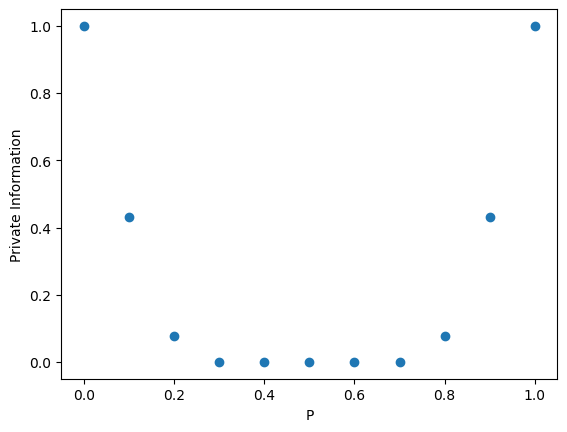

In [151]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a=[0.9999999999980588,0.4310044064076264,0.07807190510919781,0,0,0,0,0,0.07807190511263595,0.4310044063984302,0.9999999999923324]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Private Information")
ply.show()

In [256]:
def SupE2(theta): ##Not Orthogonal Superposition case
    e=np.matmul(c,c.conj().T)
    g=np.matmul(d,d.conj().T)
    y_0=np.cos(theta[0])*a+np.exp(1j*theta[1])*np.sin(theta[0])*b
    y_1=np.cos(theta[9])*a+np.exp(1j*theta[10])*np.sin(theta[9])*b
    p_y_0=np.matmul(y_0,y_0.conj().T)
    p_y_1=np.matmul(y_1,y_1.conj().T)
    p_XA=theta[2]*np.kron(np.matmul(a,a.conj().T),p_y_0)+(1-theta[2])*np.kron(np.matmul(b,b.conj().T),p_y_1)
    p_XB=theta[2]*np.kron(np.matmul(a,a.conj().T),BB84(0.3,p_y_0))+(1-theta[2])*np.kron(np.matmul(b,b.conj().T),BB84(0.3,p_y_1))
    p_B=theta[2]*BB84(0.3,p_y_0)+(1-theta[2])*BB84(0.3,p_y_1)
    p_A=theta[2]*p_y_0+(1-theta[2])*p_y_1
    p_X=theta[2]*np.matmul(a,a.conj().T)+(1-theta[2])*np.matmul(b,b.conj().T)
    F=(1-0.3)**2*np.exp(-1j*theta[3])*I+0.3*(1-0.3)*np.exp(-1j*theta[4])*X+0.3*(1-0.3)*np.exp(-1j*theta[5])*Z+0.3**2*np.exp(-1j*theta[6])*Y
    phi3=p_X
    phi4=np.kron(0.5*(p_B+np.matmul(F,np.matmul(p_A,F.conj().T))),e)+np.kron(0.5*(p_B-np.matmul(F,np.matmul(p_A,F.conj().T))),g)
    phi5=np.kron(0.5*(p_XB+np.matmul(np.kron(I,F),np.matmul(p_XA,np.kron(I,F.conj().T)))),e)+np.kron(0.5*(p_XB-np.matmul(np.kron(I,F),np.matmul(p_XA,np.kron(I,F.conj().T)))),g)
    h=-np.trace(np.matmul(phi3,log2(phi3)))
    j=-np.trace(np.matmul(phi4,log2(phi4)))
    k=-np.trace(np.matmul(phi5,log2(phi5)))
    E=np.cos(theta[7])*a+np.sin(theta[7])*np.exp(1j*theta[8])*b
    E1=np.matmul(E,E.conj().T)
    u_00=(1-0.3)*I           
    u_01=np.sqrt((1-0.3)*0.3)*X
    u_10=np.sqrt((1-0.3)*0.3)*Z
    u_11=0.3*Y
    u=np.kron(u_00,np.matmul(a,a.conj().T))+np.kron(u_01,np.matmul(a,b.conj().T))+np.kron(u_10,np.matmul(b,a.conj().T))+np.kron(u_11,np.matmul(b,b.conj().T))
    f1=np.trace(np.matmul(u_00,np.matmul(p_A,u_00.conj().T))*np.cos(theta[7])**2+np.cos(theta[7])*np.sin(theta[7])*np.exp(-1j*theta[8])*np.matmul(u_00,np.matmul(p_A,u_01.conj().T))+np.cos(theta[7])*np.sin(theta[7])*np.exp(1j*theta[8])*np.matmul(u_01,np.matmul(p_A,u_00.conj().T))+np.matmul(u_01,np.matmul(p_A,u_01.conj().T))*np.sin(theta[7])**2)
    f2=np.trace(np.matmul(u_00,np.matmul(p_A,u_10.conj().T))*np.cos(theta[7])**2+np.cos(theta[7])*np.sin(theta[7])*np.exp(-1j*theta[8])*np.matmul(u_00,np.matmul(p_A,u_11.conj().T))+np.cos(theta[7])*np.sin(theta[7])*np.exp(1j*theta[8])*np.matmul(u_01,np.matmul(p_A,u_10.conj().T))+np.matmul(u_01,np.matmul(p_A,u_11.conj().T))*np.sin(theta[7])**2)
    f3=np.trace(np.matmul(u_10,np.matmul(p_A,u_00.conj().T))*np.cos(theta[7])**2+np.cos(theta[7])*np.sin(theta[7])*np.exp(-1j*theta[8])*np.matmul(u_10,np.matmul(p_A,u_01.conj().T))+np.cos(theta[7])*np.sin(theta[7])*np.exp(1j*theta[8])*np.matmul(u_11,np.matmul(p_A,u_00.conj().T))+np.matmul(u_11,np.matmul(p_A,u_01.conj().T))*np.sin(theta[7])**2)
    f4=np.trace(np.matmul(u_10,np.matmul(p_A,u_10.conj().T))*np.cos(theta[7])**2+np.cos(theta[7])*np.sin(theta[7])*np.exp(-1j*theta[8])*np.matmul(u_10,np.matmul(p_A,u_11.conj().T))+np.cos(theta[7])*np.sin(theta[7])*np.exp(1j*theta[8])*np.matmul(u_11,np.matmul(p_A,u_10.conj().T))+np.matmul(u_11,np.matmul(p_A,u_11.conj().T))*np.sin(theta[7])**2)
    f5=[[f1,f2], [f3,f4]]
    phi6=np.kron(0.5*(f5+np.matmul(F,np.matmul(E1,F.conj().T))),e)+np.kron(0.5*(f5-np.matmul(F,np.matmul(E1,F.conj().T))),g)
    phi7=p_X
    phi8=np.kron(0.5*(np.kron(p_X,f5)+np.matmul(np.kron(I,F),np.matmul(np.kron(p_X,E1),np.kron(I,F.conj().T)))),e)+np.kron(0.5*(np.kron(p_X,f5)-np.matmul(np.kron(I,F),np.matmul(np.kron(p_X,E1),np.kron(I,F.conj().T)))),g)
    h1=-np.trace(np.matmul(phi6,log2(phi6)))
    j1=-np.trace(np.matmul(phi7,log2(phi7)))
    k1=-np.trace(np.matmul(phi8,log2(phi8)))
    return -(h+j-k-(h1+j1-k1))

In [257]:
from scipy.optimize import dual_annealing, minimize, differential_evolution
bnds = [(0,np.pi/2),(0,np.pi*2),(0,1),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2),(0,np.pi/2),(0,np.pi*2),(0,np.pi/2),(0,np.pi*2)]
results = dual_annealing(SupE2,bnds,maxiter=100)
results

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: (-0-0j)
       x: [ 8.106e-01  6.001e+00  1.000e+00  3.469e+00  5.880e+00
            5.291e+00  2.474e+00  3.139e-01  6.144e+00  3.798e-01
            9.520e-01]
     nit: 100
    nfev: 2225
    njev: 2
    nhev: 0

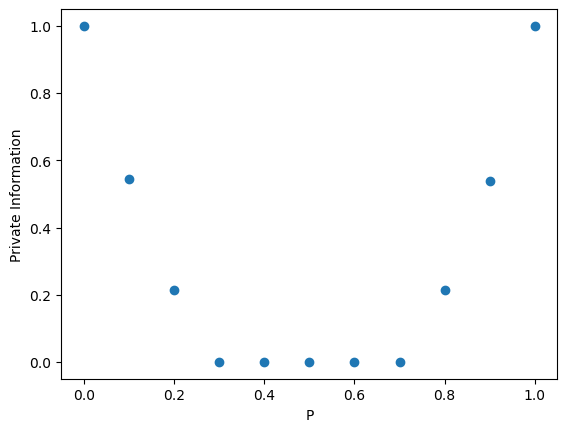

In [245]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a=[0.9999999999703237,0.545411925320527,0.21392937675791335,0,0,0,0,0,0.21393553235245433,0.5393774475749149,0.9999999999618845]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Private Information")
ply.show()

In [150]:
def SupE3(theta): ##Not Orthogonal Superposition case for fixed phi in F
    e=np.matmul(c,c.conj().T)
    g=np.matmul(d,d.conj().T)
    y_0=np.cos(theta[0])*a+np.exp(1j*theta[1])*np.sin(theta[0])*b
    y_1=np.cos(theta[5])*a+np.exp(1j*theta[6])*np.sin(theta[5])*b
    p_y_0=np.matmul(y_0,y_0.conj().T)
    p_y_1=np.matmul(y_1,y_1.conj().T)
    p_XA=theta[2]*np.kron(np.matmul(a,a.conj().T),p_y_0)+(1-theta[2])*np.kron(np.matmul(b,b.conj().T),p_y_1)
    p_XB=theta[2]*np.kron(np.matmul(a,a.conj().T),BB84(0,p_y_0))+(1-theta[2])*np.kron(np.matmul(b,b.conj().T),BB84(0,p_y_1))
    p_B=theta[2]*BB84(0,p_y_0)+(1-theta[2])*BB84(0,p_y_1)
    p_A=theta[2]*p_y_0+(1-theta[2])*p_y_1
    p_X=theta[2]*np.matmul(a,a.conj().T)+(1-theta[2])*np.matmul(b,b.conj().T)
    F=(1-0)**2*np.exp(-1j*np.pi/2)*I+0*(1-0.9)*np.exp(-1j*np.pi/2)*X+0*(1-0.9)*np.exp(-1j*np.pi/2)*Z+0**2*np.exp(-1j*np.pi/2)*Y
    phi3=p_X
    phi4=np.kron(0.5*(p_B+np.matmul(F,np.matmul(p_A,F.conj().T))),e)+np.kron(0.5*(p_B-np.matmul(F,np.matmul(p_A,F.conj().T))),g)
    phi5=np.kron(0.5*(p_XB+np.matmul(np.kron(I,F),np.matmul(p_XA,np.kron(I,F.conj().T)))),e)+np.kron(0.5*(p_XB-np.matmul(np.kron(I,F),np.matmul(p_XA,np.kron(I,F.conj().T)))),g)
    h=-np.trace(np.matmul(phi3,log2(phi3)))
    j=-np.trace(np.matmul(phi4,log2(phi4)))
    k=-np.trace(np.matmul(phi5,log2(phi5)))
    E=np.cos(theta[3])*a+np.sin(theta[3])*np.exp(1j*theta[4])*b
    E1=np.matmul(E,E.conj().T)
    u_00=(1-0)*I           
    u_01=np.sqrt((1-0.9)*0)*X
    u_10=np.sqrt((1-0.9)*0)*Z
    u_11=0*Y
    u=np.kron(u_00,np.matmul(a,a.conj().T))+np.kron(u_01,np.matmul(a,b.conj().T))+np.kron(u_10,np.matmul(b,a.conj().T))+np.kron(u_11,np.matmul(b,b.conj().T))
    f1=np.trace(np.matmul(u_00,np.matmul(p_A,u_00.conj().T))*np.cos(theta[3])**2+np.cos(theta[3])*np.sin(theta[3])*np.exp(-1j*theta[4])*np.matmul(u_00,np.matmul(p_A,u_01.conj().T))+np.cos(theta[3])*np.sin(theta[3])*np.exp(1j*theta[4])*np.matmul(u_01,np.matmul(p_A,u_00.conj().T))+np.matmul(u_01,np.matmul(p_A,u_01.conj().T))*np.sin(theta[3])**2)
    f2=np.trace(np.matmul(u_00,np.matmul(p_A,u_10.conj().T))*np.cos(theta[3])**2+np.cos(theta[3])*np.sin(theta[3])*np.exp(-1j*theta[4])*np.matmul(u_00,np.matmul(p_A,u_11.conj().T))+np.cos(theta[3])*np.sin(theta[3])*np.exp(1j*theta[4])*np.matmul(u_01,np.matmul(p_A,u_10.conj().T))+np.matmul(u_01,np.matmul(p_A,u_11.conj().T))*np.sin(theta[3])**2)
    f3=np.trace(np.matmul(u_10,np.matmul(p_A,u_00.conj().T))*np.cos(theta[3])**2+np.cos(theta[3])*np.sin(theta[3])*np.exp(-1j*theta[4])*np.matmul(u_10,np.matmul(p_A,u_01.conj().T))+np.cos(theta[3])*np.sin(theta[3])*np.exp(1j*theta[4])*np.matmul(u_11,np.matmul(p_A,u_00.conj().T))+np.matmul(u_11,np.matmul(p_A,u_01.conj().T))*np.sin(theta[3])**2)
    f4=np.trace(np.matmul(u_10,np.matmul(p_A,u_10.conj().T))*np.cos(theta[3])**2+np.cos(theta[3])*np.sin(theta[3])*np.exp(-1j*theta[4])*np.matmul(u_10,np.matmul(p_A,u_11.conj().T))+np.cos(theta[3])*np.sin(theta[3])*np.exp(1j*theta[4])*np.matmul(u_11,np.matmul(p_A,u_10.conj().T))+np.matmul(u_11,np.matmul(p_A,u_11.conj().T))*np.sin(theta[3])**2)
    f5=[[f1,f2], [f3,f4]]
    phi6=np.kron(0.5*(f5+np.matmul(F,np.matmul(E1,F.conj().T))),e)+np.kron(0.5*(f5-np.matmul(F,np.matmul(E1,F.conj().T))),g)
    phi7=p_X
    phi8=np.kron(0.5*(np.kron(p_X,f5)+np.matmul(np.kron(I,F),np.matmul(np.kron(p_X,E1),np.kron(I,F.conj().T)))),e)+np.kron(0.5*(np.kron(p_X,f5)-np.matmul(np.kron(I,F),np.matmul(np.kron(p_X,E1),np.kron(I,F.conj().T)))),g)
    h1=-np.trace(np.matmul(phi6,log2(phi6)))
    j1=-np.trace(np.matmul(phi7,log2(phi7)))
    k1=-np.trace(np.matmul(phi8,log2(phi8)))
    return -(h+j-k-(h1+j1-k1))

In [151]:
from scipy.optimize import dual_annealing, minimize, differential_evolution
bnds = [(0,np.pi/2),(0,np.pi*2),(0,1),(0,np.pi/2),(0,np.pi*2),(0,np.pi/2),(0,np.pi*2)]
results = dual_annealing(SupE3,bnds,maxiter=10)
results

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: (-0.9999999999795521-1.8334327725065152e-05j)
       x: [ 1.392e+00  5.352e+00  5.000e-01  4.045e-06  2.043e+00
            1.792e-01  2.211e+00]
     nit: 10
    nfev: 237
    njev: 12
    nhev: 0

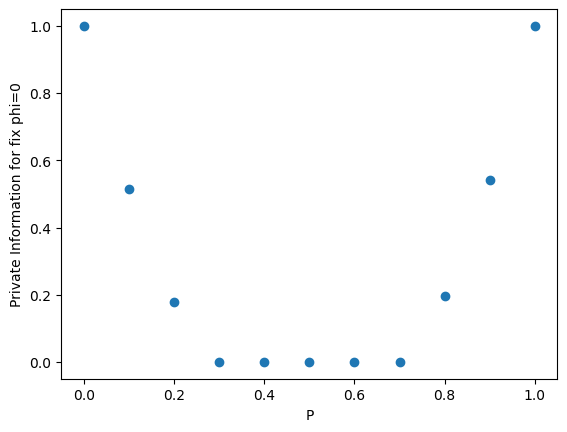

In [74]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=0
a=[0.9999999996989539,0.5148630448077807,0.17789324534995954,0,0,0,0,0,0.1962925285770214,0.5425821999882858,0.9999999999938409]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Private Information for fix phi=0")
ply.show()

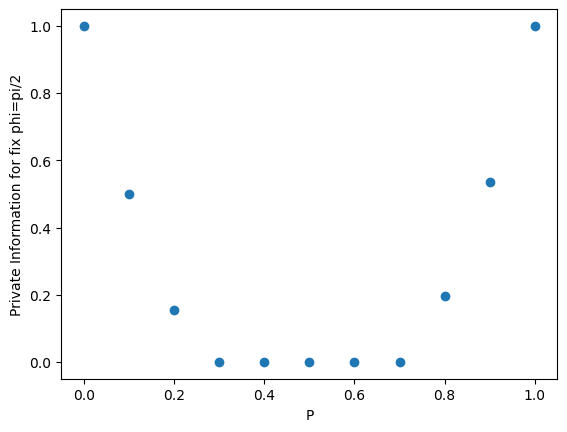

In [152]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=pi/2
a=[0.9999999999795521,0.4996150117648672,0.15544260898174622,0,0,0,0,0,0.19629252865934532,0.5340816734323584,0.9999999999999518]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Private Information for fix phi=pi/2")
ply.show()

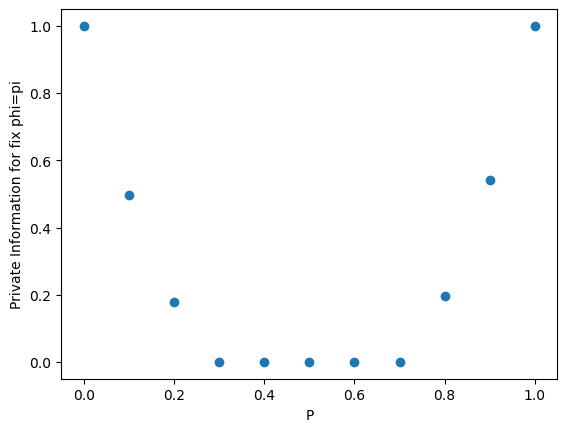

In [127]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=pi
a=[0.9999999998928019,0.49746424537113354,0.17789324526067007,0,0,0,0,0,0.1961134986330053,0.5425821231185262,0.9999999999861893]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Private Information for fix phi=pi")
ply.show()

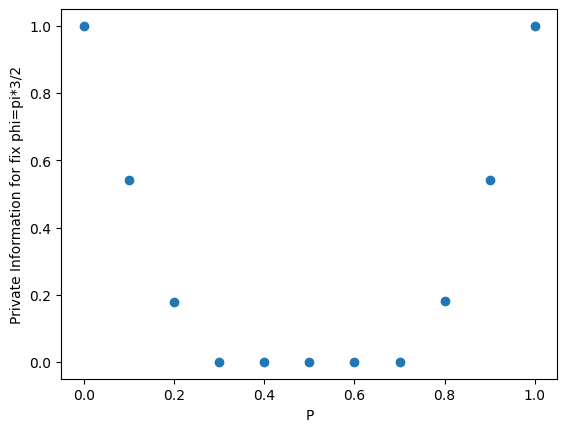

In [153]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=pi*3/2
a=[0.9999999996891648,0.5425824507642487,0.17789324537822404,0,0,0,0,0,0.1802369656783982,0.5425821225288245,0.9999999998394212]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Private Information for fix phi=pi*3/2")
ply.show()

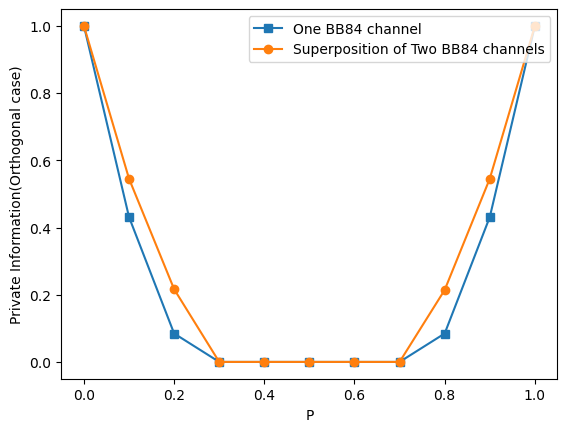

In [111]:
m1=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a1=[0.9999999999999981,0.43100440641009774,0.08457237184966537,0,0,0,0,0,0.08457237174515475,0.43100440640460147,0.9999999999969549]
m2=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a2=[0.9999999999996929,0.5452074781344851,0.21647286011113365,0,0,0,0,0,0.2141774263007723,0.5452074792756527,0.9999999999998554]
fig=ply.figure()
ax1 = fig.add_subplot(111)
ax1.plot(m1,a1,marker='s',label='One BB84 channel')
ax1.plot(m2,a2,marker='o',label='Superposition of Two BB84 channels')
ply.legend(loc="upper right")
ply.xlabel("P")
ply.ylabel("Private Information(Orthogonal case)")
ply.show()

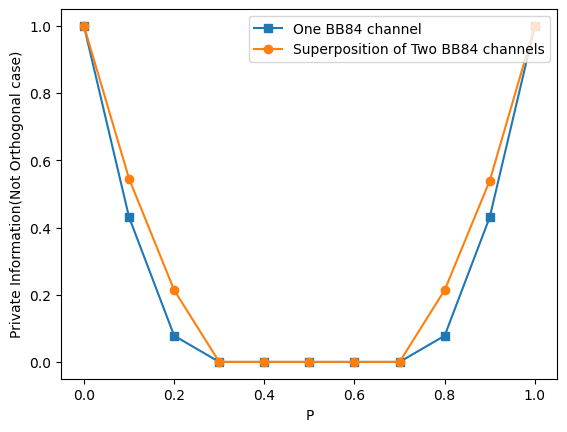

In [261]:
m1=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a1=[0.9999999999980588,0.4310044064076264,0.07807190510919781,0,0,0,0,0,0.07807190511263595,0.4310044063984302,0.9999999999923324]
m2=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a2=[0.9999999999703237,0.545411925320527,0.21392937675791335,0,0,0,0,0,0.21393553235245433,0.5393774475749149,0.9999999999618845]
fig=ply.figure()
ax1 = fig.add_subplot(111)
ax1.plot(m1,a1,marker='s',label='One BB84 channel')
ax1.plot(m2,a2,marker='o',label='Superposition of Two BB84 channels')
ply.legend(loc="upper right")
ply.xlabel("P")
ply.ylabel("Private Information(Not Orthogonal case)")
ply.show()

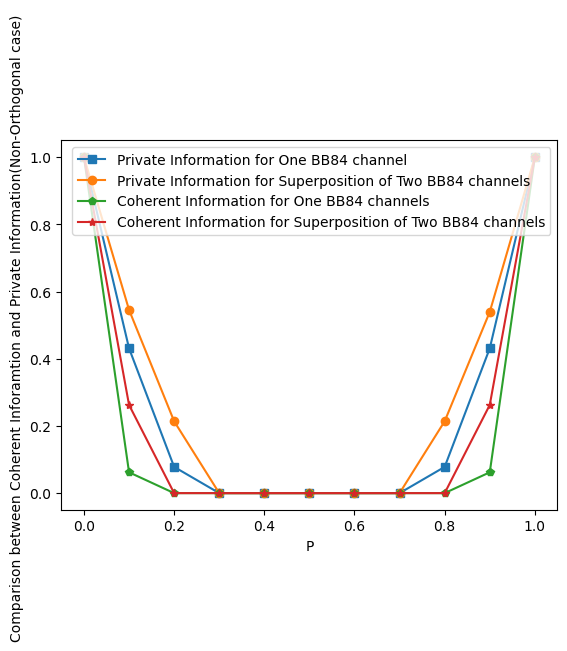

In [90]:
m1=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a1=[0.9999999999980588,0.4310044064076264,0.07807190510919781,0,0,0,0,0,0.07807190511263595,0.4310044063984302,0.9999999999923324]
m2=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a2=[0.9999999999703237,0.545411925320527,0.21392937675791335,0,0,0,0,0,0.21393553235245433,0.5393774475749149,0.9999999999618845]
m3=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a3=[0.9999999999940516,0.06200881280187809,2.7909563549144423e-11,2.220446049250313e-16,3.613402699276236e-07,1.2716734332229862e-09,2.220446049250313e-16,1.1102230246251565e-15,-5.551115123125783e-16,0.06200881282142001,0.9999999999969549]
m4=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a4=[0.999999999999952,0.2625029926621154,1.2382317393644371e-11,2.826960977908577e-05,0,0,-5.44212674924438e-10,-4.178990486991552e-11,-1.021467355144523e-10,0.2625029926979081,0.9998739845388571]
fig=ply.figure()
ax1 = fig.add_subplot(111)
ax1.plot(m1,a1,marker='s',label='Private Information for One BB84 channel')
ax1.plot(m2,a2,marker='o',label='Private Information for Superposition of Two BB84 channels')
ax1.plot(m3,a3,marker='p',label='Coherent Information for One BB84 channels')
ax1.plot(m4,a4,marker='*',label='Coherent Information for Superposition of Two BB84 channels')
ply.legend(loc="upper right")
ply.xlabel("P")
ply.ylabel("Comparison between Coherent Inforamtion and Private Information(Non-Orthogonal case) ")
ply.show()

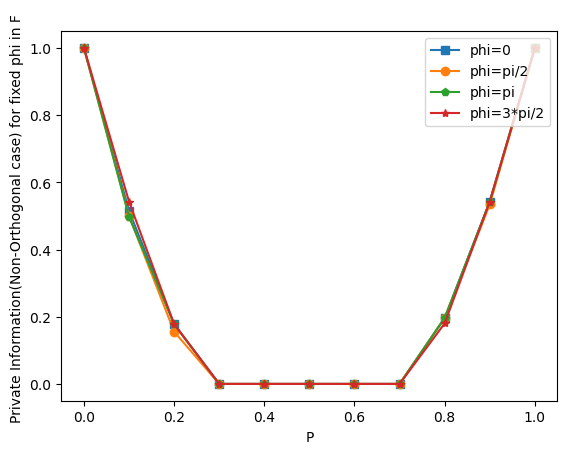

In [154]:
m1=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=0
a1=[0.9999999996989539,0.5148630448077807,0.17789324534995954,0,0,0,0,0,0.1962925285770214,0.5425821999882858,0.9999999999938409]
m2=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=pi/2
a2=[0.9999999999795521,0.4996150117648672,0.15544260898174622,0,0,0,0,0,0.19629252865934532,0.5340816734323584,0.9999999999999518]
m3=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=pi
a3=[0.9999999998928019,0.49746424537113354,0.17789324526067007,0,0,0,0,0,0.1961134986330053,0.5425821231185262,0.9999999999861893]
m4=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=pi*3/2
a4=[0.9999999996891648,0.5425824507642487,0.17789324537822404,0,0,0,0,0,0.1802369656783982,0.5425821225288245,0.9999999998394212]
fig=ply.figure()
ax1 = fig.add_subplot(111)
ax1.plot(m1,a1,marker='s',label='phi=0')
ax1.plot(m2,a2,marker='o',label='phi=pi/2')
ax1.plot(m3,a3,marker='p',label='phi=pi')
ax1.plot(m4,a4,marker='*',label='phi=3*pi/2')
ply.legend(loc="upper right")
ply.xlabel("P")
ply.ylabel("Private Information(Non-Orthogonal case) for fixed phi in F ")
ply.show()